# The Impact of the Olympic Games on Airbnb Pricing

I would like to extend my gratitude to the Hackathon Team at Paris-Dauphine University's Tunisian Campus for providing us with access to Airbnb scraping data spanning 5 last semesters.

Knowing the fact that while doing this analysis, we were on march, we only had access to every semester from March 2023 to March 2024.
Our Analysis will focus on the price fluctuations on every neighborhood of Paris.

We assume that these fluctuations are attributed to the upcoming Olympic Games

In [2]:
import numpy as np  # linear algebra
import pandas as pd

In [8]:
df_2023_03=pd.read_csv("calendar2023_03.csv.gz")

In [ ]:
df_2023_06=pd.read_csv("calendar2023_06.csv.gz")

In [4]:
df_2023_09=pd.read_csv("calendar2023_09.csv.gz")

In [12]:
df_2023_12=pd.read_csv("calendar2023_12.csv.gz")

C:\Users\Youssef\AppData\Local\Temp\ipykernel_13548\2197310274.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023_12=pd.read_csv("calendar2023_12.csv.gz")


In [79]:
df_2024_03=pd.read_csv("calendar2024_03.csv.gz")

C:\Users\Youssef\AppData\Local\Temp\ipykernel_5548\744406235.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024_03=pd.read_csv("calendar2024_03.csv.gz")


In [80]:
df_2024_03.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,2024-03-19,f,$250.00,NaN,2.0,30.0
1,3109,2024-03-20,t,$250.00,NaN,2.0,30.0
2,3109,2024-03-21,t,$250.00,NaN,2.0,30.0
3,3109,2024-03-22,t,$250.00,NaN,2.0,30.0
4,3109,2024-03-23,t,$250.00,NaN,2.0,30.0


In [5]:
df_2023_03['price'] = df_2023_03['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
df_2023_06['price'] = df_2023_06['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
df_2023_09['price'] = df_2023_09['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [17]:
df_2023_12['price'] = df_2023_12['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [6]:
df_2024_03['price'] = df_2024_03['price'].str.replace('$', '').str.replace(',', '').astype(float)

After importing the data, let's begin by visualizing the overall price fluctuations.

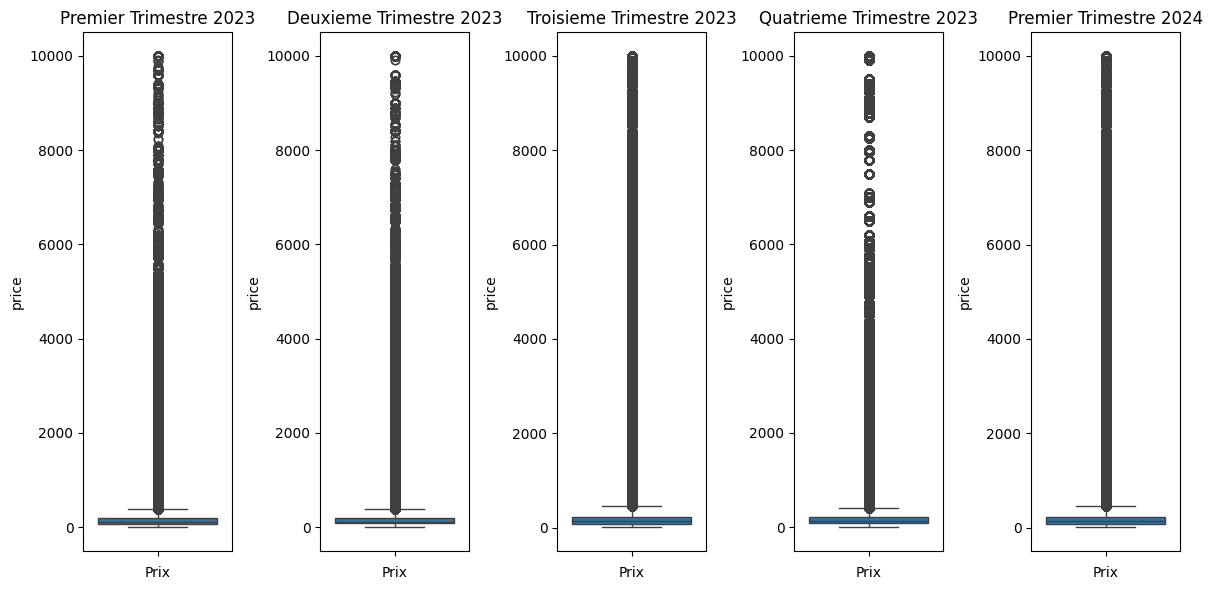

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une figure et une grille de sous-graphiques avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 5, figsize=(12, 6))

# Boxplot pour la variable "prix" du premier DataFrame (df1)
sns.boxplot(data=df_2023_03_filtered['price'], ax=axes[0])
axes[0].set_title('Premier Trimestre 2023')
axes[0].set_xlabel('Prix')

# Boxplot pour la variable "prix" du deuxième DataFrame (df2)
sns.boxplot(data=df_2023_06_filtered['price'], ax=axes[1])
axes[1].set_title('Deuxieme Trimestre 2023')
axes[1].set_xlabel('Prix')

sns.boxplot(data=df_2023_09_filtered['price'], ax=axes[2])
axes[2].set_title('Troisieme Trimestre 2023')
axes[2].set_xlabel('Prix')

sns.boxplot(data=df_2023_12_filtered['price'], ax=axes[3])
axes[3].set_title('Quatrieme Trimestre 2023')
axes[3].set_xlabel('Prix')

sns.boxplot(data=df_2023_09_filtered['price'], ax=axes[4])
axes[4].set_title('Premier Trimestre 2024')
axes[4].set_xlabel('Prix')
# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher les graphiques
plt.show()

Due to the presence of extreme values, the differences in prices are not easily observable on the graph, so we have decide to filter our data.

So we remove the outliers

In [20]:
df_2023_03["price"].kurtosis()

11631.491899456292

In [28]:
import pandas as pd


# Calculate the kurtosis of the "price" column
kurtosis_value = df_2023_03["price"].kurtosis()


threshold = 3  # For normal distribution, usually |kurtosis| > 3 indicates outliers

# Filter out the rows where the price is considered an outlier
df_2023_03_filtered = df_2023_03[df_2023_03["price"].abs() < threshold]

# Now, filtered_df contains your DataFrame with outliers removed based on kurtosis


In [29]:
import pandas as pd

kurtosis_value = df_2023_06["price"].kurtosis()

threshold = 3 


df_2023_06_filtered = df_2023_06[df_2023_06["price"].abs() < threshold]



In [30]:
import pandas as pd


kurtosis_value = df_2023_09["price"].kurtosis()

threshold = 3  


df_2023_09_filtered = df_2023_09[df_2023_09["price"].abs() < threshold]


In [31]:
import pandas as pd


kurtosis_value = df_2023_12["price"].kurtosis()


threshold = 3  


df_2023_12_filtered = df_2023_12[df_2023_12["price"].abs() < threshold]




In [32]:
import pandas as pd


kurtosis_vale = df_2024_03["price"].kurtosis()

threshold = 3 


df_2024_03_filterd = df_2024_03[df_2024_03["price"].abs() < threshold]



In [46]:
 [quartiles_df1.mean(), quartiles_df2.mean(), quartiles_df3.mean(), quartiles_df4.mean(),quartiles_df5.mean()]

[nan, nan, nan, 145.0, 169.5]

In [50]:
def remove_outliers(df0):
    df=df0.copy()
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    df.loc[(df['price']< (Q1 - 1.5 * IQR)) | (df['price']>  (Q3 + 1.5 * IQR)), 'price'] = None
    return(df)

In [51]:
df_2023_03_filtered=remove_outliers(df_2023_03)

In [52]:
df_2023_06_filtered=remove_outliers(df_2023_06)

In [53]:
df_2023_09_filtered=remove_outliers(df_2023_09)

In [54]:
df_2023_12_filtered=remove_outliers(df_2023_12)

In [55]:
df_2024_03_filtered=remove_outliers(df_2024_03)

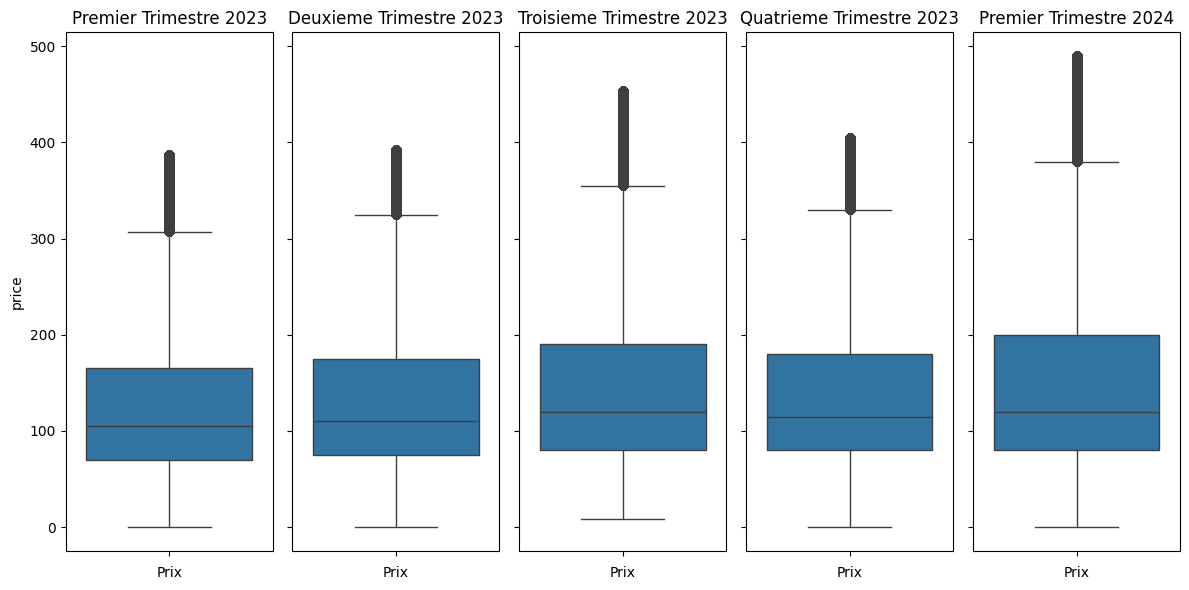

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une figure et une grille de sous-graphiques avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 5, figsize=(12, 6),sharey=True)

# Boxplot pour la variable "prix" du premier DataFrame (df1)
sns.boxplot(data=df_2023_03_filtered['price'], ax=axes[0])
axes[0].set_title('Premier Trimestre 2023')
axes[0].set_xlabel('Prix')

# Boxplot pour la variable "prix" du deuxième DataFrame (df2)
sns.boxplot(data=df_2023_06_filtered['price'], ax=axes[1])
axes[1].set_title('Deuxieme Trimestre 2023')
axes[1].set_xlabel('Prix')

sns.boxplot(data=df_2023_09_filtered['price'], ax=axes[2])
axes[2].set_title('Troisieme Trimestre 2023')
axes[2].set_xlabel('Prix')

sns.boxplot(data=df_2023_12_filtered['price'], ax=axes[3])
axes[3].set_title('Quatrieme Trimestre 2023')
axes[3].set_xlabel('Prix')

sns.boxplot(data=df_2024_03_filtered['price'], ax=axes[4])
axes[4].set_title('Premier Trimestre 2024')
axes[4].set_xlabel('Prix')
# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher les graphiques
plt.show()

This boxplot  does not allow us to clearly visualize the difference between the prices of 2023 and 2024, as the intra-year evolution does not show a consistent trend, but rather fluctuations that could be attributed to seasonality. Let's directly compare the values of 2023 and 2024.

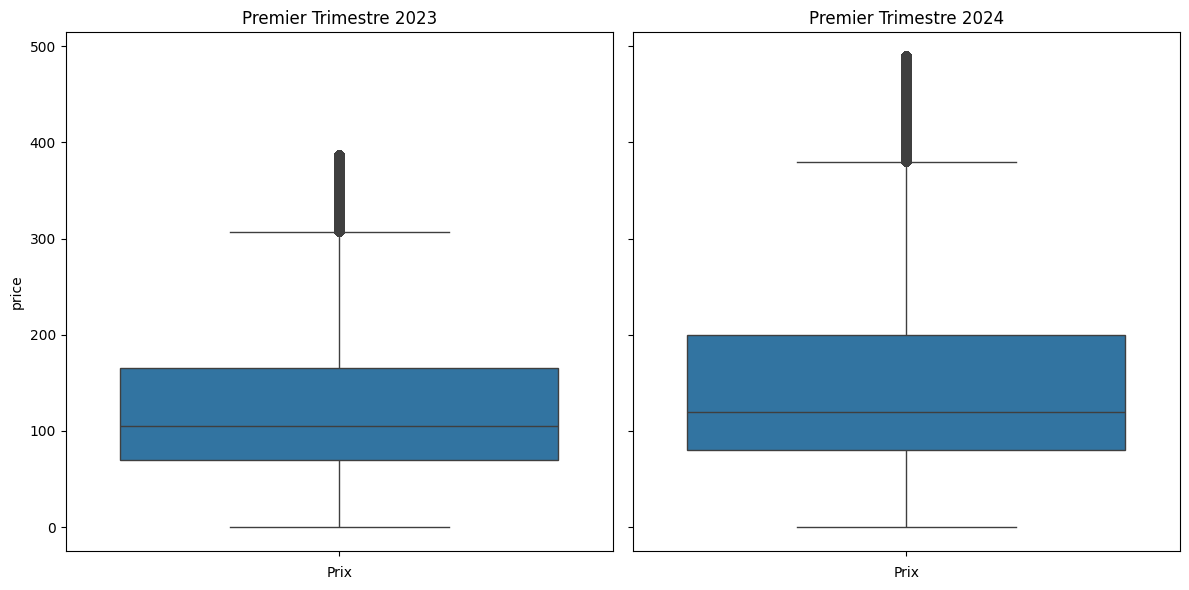

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une figure et une grille de sous-graphiques avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(12, 6),sharey=True)

# Boxplot pour la variable "prix" du premier DataFrame (df1)
sns.boxplot(data=df_2023_03_filtered['price'], ax=axes[0])
axes[0].set_title('Premier Trimestre 2023')
axes[0].set_xlabel('Prix')

sns.boxplot(data=df_2024_03_filtered['price'], ax=axes[1])
axes[1].set_title('Premier Trimestre 2024')
axes[1].set_xlabel('Prix')
# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()

# Afficher les graphiques
plt.show()

Between March 2023 and March 2024, the median price of an Airbnb night in Paris increases from around `$100` to `$120`. However, what is also noteworthy is that in March 2023, 50% of the prices ranged between `$60` and `$170`, whereas for the same period, 50% of the prices are between `$80` and `$200` in March 2024.




Now, let's see if the price map changes between March 2023 and March 2024.

In [3]:
df_listing_2023_03=pd.read_csv("listings2023_03.csv.gz")

In [20]:
df_listing_2023_06=pd.read_csv("listings2023_06.csv.gz")

In [21]:
df_listing_2023_09=pd.read_csv("listings2023_09.csv.gz")

In [22]:
df_listing_2023_12=pd.read_csv("listings2023_12.csv.gz")

In [3]:
df_listing_2024_03=pd.read_csv("listings2024_03.csv.gz")

In [55]:
df_listing_2024_03.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, France",NaN,within a day,100%,80%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,2.0,"['email', 'phone']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83191,2.31870,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$250.00,2,30,2,2,30,30,2.0,30.0,NaN,t,29,59,89,355,2024-03-19,4,0,0,2017-10-28,2019-10-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,https://www.airbnb.com/users/show/788732,Marylin & Ophelie,2011-07-07,"Paris, France","found of life , I'm curious about all types o...",within a few hours,100%,96%,t,https://a0.muscache.com/im/users/788732/profil...,https://a0.muscache.com/im/users/788732/profil...,III Arrondissement,1.0,1.0,"['email', 'phone']",t,t,NaN,Temple,NaN,48.86652,2.36261,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",$140.00,3,365,3,3,365,365,3.0,365.0,NaN,t,15,25,25,25,2024-03-19,106,14,0,2011-08-13,2023-10-21,4.68,4.72,4.59,4.87,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Paris, France",We have spent a lot of time traveling for work...,within an hour,100%,97%,f,https://a0.muscache.com/im/users/7903/profile_...,https://a0.muscache.com/im/users/7903/profile_...,Saint-Paul - Ile Saint-Louis,2.0,3.0,"['email', 'phone']",t,t,"Paris, Ile-de-France, France",Hôtel-de-Ville,NaN,48.85247,2.35835,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$107.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,5,6,183,2024-03-18,393,61,5,2009-06-30,2024-03-14,4.60,4.63,4.57,4.81,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scra

In [10]:
df_listing_2024_03 = pd.merge(df_listing_2024_03, quartier, on='id', how='left')

In [11]:
df_listing_2024_03=df_listing_2024_03.drop(columns=['id'])

In [15]:
df_listing_2024_03=df_listing_2024_03.fillna(0)

In [90]:
df_listing_2024_03.shape

(16126788, 28)

In [5]:
df_listing_2023_03=df_listing_2023_03[['id','host_location','latitude','longitude']]

In [6]:
df_listing_2024_03=df_listing_2024_03[['id','host_location','latitude','longitude']]

In [9]:
dfTrim1 = pd.merge(df_listing_2023_03, df_2023_03, how='inner', left_on='id', right_on='listing_id')

In [10]:
dfTrim2= pd.merge(df_listing_2024_03, df_2024_03, how='inner', left_on='id', right_on='listing_id')

In [11]:
dfTrim1.to_pickle('dfTrim1.pkl')

In [12]:
dfTrim2.to_pickle('dfTrim2.pkl')

In [3]:
dfTrim1 = pd.read_pickle('dfTrim1.pkl')

In [3]:
dfTrim2 = pd.read_pickle('dfTrim2.pkl')

In [26]:
dfTrim1.head()

,id,host_location,latitude,longitude,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-14,f,123.0,$123.00,1.0,1125.0
1,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-15,f,123.0,$123.00,1.0,1125.0
2,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-16,f,124.0,$124.00,1.0,1125.0
3,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-17,f,124.0,$124.00,1.0,1125.0
4,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-18,f,124.0,$124.00,1.0,1125.0


In [13]:
dfTrim2.head()

,id,host_location,latitude,longitude,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,"Paris, France",48.83191,2.3187,3109,2024-03-19,f,250.0,NaN,2.0,30.0
1,3109,"Paris, France",48.83191,2.3187,3109,2024-03-20,t,250.0,NaN,2.0,30.0
2,3109,"Paris, France",48.83191,2.3187,3109,2024-03-21,t,250.0,NaN,2.0,30.0
3,3109,"Paris, France",48.83191,2.3187,3109,2024-03-22,t,250.0,NaN,2.0,30.0
4,3109,"Paris, France",48.83191,2.3187,3109,2024-03-23,t,250.0,NaN,2.0,30.0


In [20]:
dfTrim1.shape

(20703571, 11)

The use of GeoPandas library is necessary for mapping, know that we now have the informations about Longitude and Latitude of the houses.

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [9]:
quartiers_paris = gpd.read_file('quartier_paris.geojson')

In [6]:
dfTrim1['geometry'] = dfTrim1.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [6]:
dfTrim2['geometry'] = dfTrim2.iloc[:20000000].apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [7]:
gdf_points1 = gpd.GeoDataFrame(dfTrim1.iloc[:20000000], geometry='geometry')

In [7]:
gdf_points2 = gpd.GeoDataFrame(dfTrim2.iloc[:20000000], geometry='geometry')

In [ ]:
gdf_joined1 = gpd.sjoin(gdf_points1, quartiers_paris, how="left", op='within')

In [ ]:
gdf_joined2 = gpd.sjoin(gdf_points2, quartiers_paris, how="left", op='within')

We save our dataframe on a pickle file so we won't lose these informations in case of a ram overflow. Indeed, our dataframe contains millions of rows.

In [11]:
gdf_joined1.to_pickle('gdf_joined1.pkl')

In [39]:
gdf_joined.columns

Index(['id', 'host_location', 'latitude', 'longitude', 'listing_id', 'date',
       'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'geometry', 'index_right', 'n_sq_qu', 'c_qu',
       'c_quinsee', 'l_qu', 'c_ar', 'n_sq_ar', 'perimetre', 'surface',
       'geom_x_y', 'st_area_shape', 'st_perimeter_shape'],
      dtype='object')

In [1]:
import geopandas as gpd

In [5]:
import pandas as pd
import geopandas as gpd

# Charger la DataFrame à partir du fichier pickle avec pandas
df = pd.read_pickle('gdf_joined1.pkl')

# Convertir la DataFrame en GeoDataFrame
gdf_joined1 = gpd.GeoDataFrame(df)

In [6]:
quartier=gdf_joined1[['id','c_qu']]

In [2]:

df1 = pd.read_pickle('gdf_joined2.pkl')

# Convertir la DataFrame en GeoDataFrame
gdf_joined2 = gpd.GeoDataFrame(df1)

In [11]:
gdf_joined1.columns

Index(['id', 'host_location', 'latitude', 'longitude', 'listing_id', 'date',
       'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'geometry', 'index_right', 'n_sq_qu', 'c_qu',
       'c_quinsee', 'l_qu', 'c_ar', 'n_sq_ar', 'perimetre', 'surface',
       'geom_x_y', 'st_area_shape', 'st_perimeter_shape'],
      dtype='object')

In [12]:
gdf_joined1.head()

,id,host_location,latitude,longitude,listing_id,date,available,price,adjusted_price,minimum_nights,...,c_qu,c_quinsee,l_qu,c_ar,n_sq_ar,perimetre,surface,geom_x_y,st_area_shape,st_perimeter_shape
0,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-14,f,$123.00,$123.00,1.0,...,14,7510402,Saint-Gervais,4,750000004,2678.340923,422028.171324,"{'lon': 2.358162333852766, 'lat': 48.855718650...",422028.171324,2678.2079
1,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-15,f,$123.00,$123.00,1.0,...,14,7510402,Saint-Gervais,4,750000004,2678.340923,422028.171324,"{'lon': 2.358162333852766, 'lat': 48.855718650...",422028.171324,2678.2079
2,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-16,f,$124.00,$124.00,1.0,...,14,7510402,Saint-Gervais,4,750000004,2678.340923,422028.171324,"{'lon': 2.358162333852766, 'lat': 48.855718650...",422028.171324,2678.2079
3,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-17,f,$124.00,$124.00,1.0,...,14,7510402,Saint-Gervais,4,750000004,2678.340923,422028.171324,"{'lon': 2.358162333852766, 'lat': 48.855718650...",422028.171324,2678.2079
4,5396,"İstanbul, Turkey",48.85247,2.35835,5396,2023-03-18,f,$124.00,$124.00,1.0,...,14,7510402,Saint-Gervais,4,750000004,2678.340923,422028.171324,"{'lon': 2.358162333852766, 'lat': 48.855718650...",422028.171324,2678.2079


In [3]:
# Supprimer les virgules des prix et remplacer "$" par une chaîne vide, puis convertir en float
gdf_joined1['price'] = gdf_joined1['price'].str.replace(',', '').str.replace('$', '').astype(float)


In [4]:

gdf_joined2['price'] = gdf_joined2['price'].str.replace(',', '').str.replace('$', '').astype(float)

In [5]:

quartiers_paris = gpd.read_file('quartier_paris.geojson')

We group our rows by neighborhood, so every neighborhood will have a mean of its prices

In [46]:

mean_price_per_quartier1 = gdf_joined1.groupby('c_qu')['price'].mean()

In [47]:

mean_price_per_quartier2 = gdf_joined2.groupby('c_qu')['price'].mean()

In [48]:
price_change_percentage = ((mean_price_per_quartier2 - mean_price_per_quartier1) / mean_price_per_quartier1) * 100

In [49]:
price_change_percentage = price_change_percentage.reset_index()

In [ ]:
quartiers_paris = quartiers_paris.merge(price_change_percentage, how='left', left_on='c_qu', right_index=True)

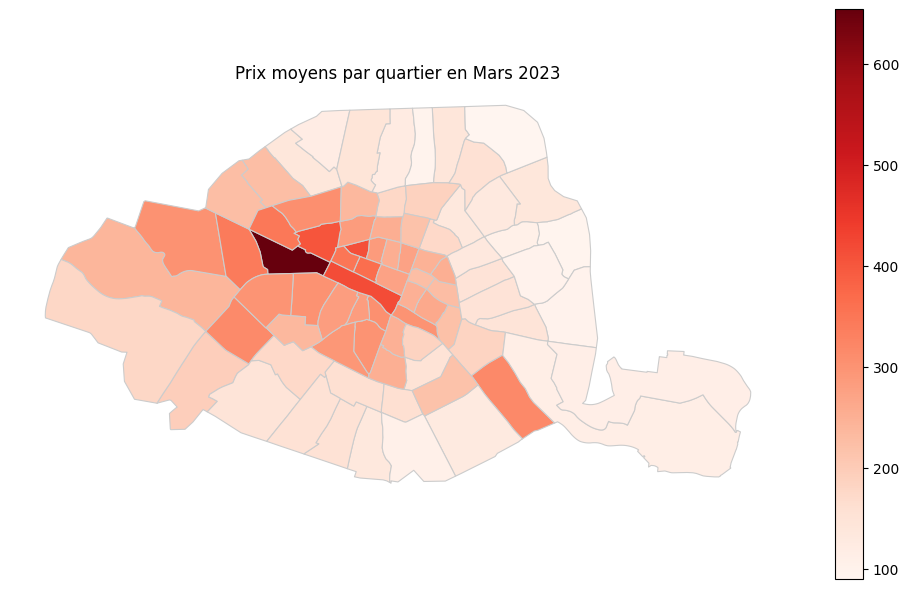

In [42]:
mean_price_per_quartier1 = gdf_joined1.groupby('c_qu')['price'].mean()
quartiers_paris = quartiers_paris.merge(mean_price_per_quartier1, how='left', left_on='c_qu', right_index=True)

# Tracer la carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
quartiers_paris.plot(column='price', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Prix moyens par quartier en Mars 2023')
plt.axis('off')  # Supprimer les axes
plt.tight_layout()
plt.show()

We can see that the neighborhood of "Les Champs-Elysées" is the most expensive in 2023 with an average price that exceeds $600

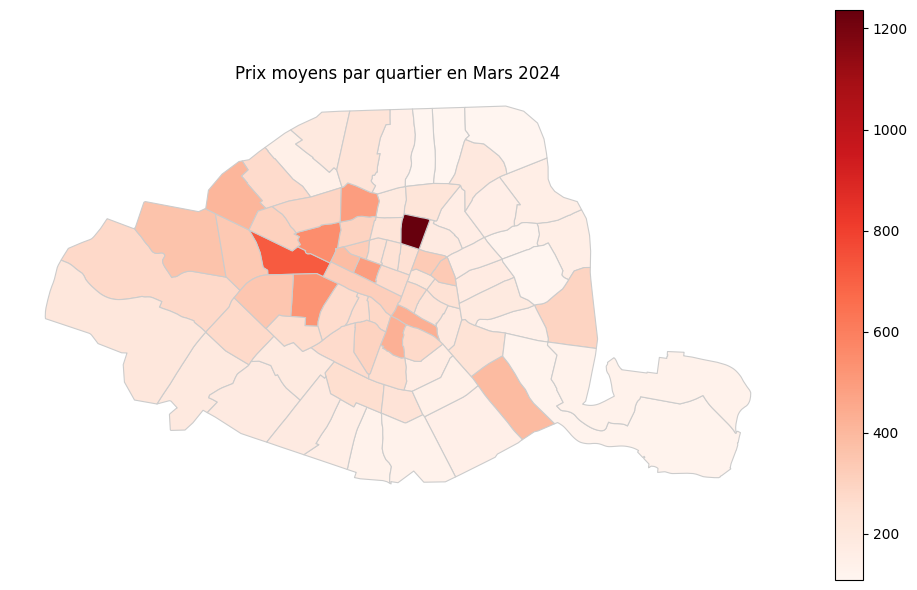

In [43]:
mean_price_per_quartier2 = gdf_joined2.groupby('c_qu')['price'].mean()
mean_price_per_quartier2 = mean_price_per_quartier2.reset_index()  # Reset index for merging
quartiers_paris = quartiers_paris.merge(mean_price_per_quartier2, how='left', left_on='c_qu', right_on='c_qu', suffixes=('_1', '_2'))

# Tracer la carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
quartiers_paris.plot(column='price_2', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Prix moyens par quartier en Mars 2024')
plt.axis('off')  # Supprimer les axes
plt.tight_layout()
plt.show()


We can notice that in 2024 the prices in "Les Champs-Elysées" didn't evolve a lot, but in March 2024, the most expensive neighborhood is "Porte-Saint-Denis" with an average price that exceeds $1200

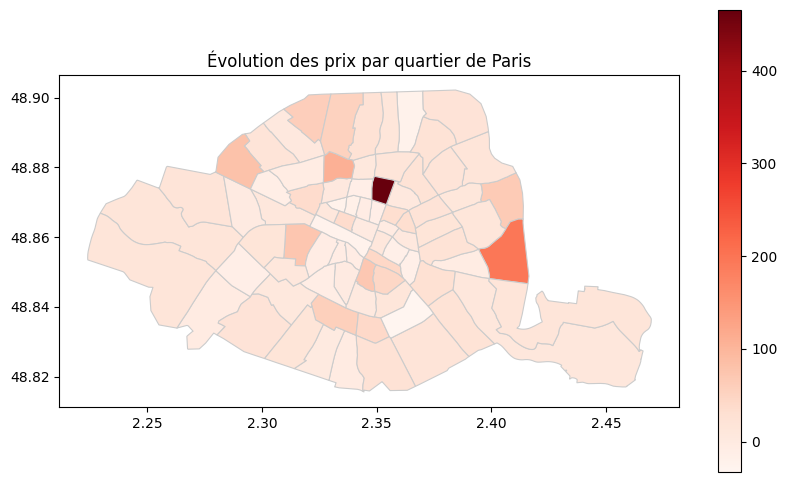

In [51]:
mean_price_per_quartier1 = gdf_joined1.groupby('c_qu')['price'].mean()
mean_price_per_quartier2 = gdf_joined2.groupby('c_qu')['price'].mean()
price_change_percentage = ((mean_price_per_quartier2 - mean_price_per_quartier1) / mean_price_per_quartier1) * 100

# Charger les données géographiques des quartiers de Paris
quartiers_paris = gpd.read_file('quartier_paris.geojson')

# Réinitialiser l'index de price_change_percentage pour pouvoir fusionner les données
price_change_percentage = price_change_percentage.reset_index()

# Fusionner les données géographiques avec les pourcentages de changement de prix
quartiers_paris = quartiers_paris.merge(price_change_percentage, how='left', on='c_qu')

# Tracer la carte choroplèthe
fig, ax = plt.subplots(1, 1,figsize=(10, 6))
quartiers_paris.plot(column='price', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Évolution des prix par quartier de Paris')
plt.show()

We focused now on the evolution of the prices of the neighborhoods in Paris, so we noticed that the most important evolution was "Porte-Saint-Denis"'s with an increase of more than 400%

There's also "Charonne"'s neighborhood that increased by more than 200%

This could be explained by the proximity to historical landmarks (such as 'Porte-Saint-Denis'), but also by the vicinity of areas where certain Olympic activities will take place (like 'Charonne')

In [16]:
mean_price_per_quartier2.head()

c_qu
1     319.128435
10    335.680782
11    238.341772
12    220.836879
13    274.843585
Name: price, dtype: float64

In [18]:
mean_price_per_quartier2.shape

(80,)

Finally, we decided to analyze the price difference based on the host's location

You can find the full analysis in the following Medium article

I would like to Thank the whole Team Such as Abbess Chaima, Ben Ghrib Samar, Ettriki Aicha, Lakhdar_Toumi Aida, Bennour Abdallah and Chortani Aziz

Published by Abdelhedi Youssef